### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:  
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [7]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [2]:
ds_cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [9]:
type(train_images)

numpy.ndarray

In [10]:
# Llevar las imágenes de entrenamiento a Blanco y Negro
train_images_2 = np.dot(train_images,[0.3, 0.59, 0.11] )

In [11]:
train_images_2.shape

(50000, 32, 32)

In [12]:
train_images_2[0]

array([[ 61.21,  44.99,  48.05, ..., 137.16, 130.57, 128.89],
       [ 18.8 ,   0.  ,  10.12, ...,  94.87,  90.17,  94.2 ],
       [ 23.97,   8.93,  31.51, ...,  90.46,  91.06,  80.39],
       ...,
       [173.26, 154.31, 157.25, ..., 134.17,  35.86,  38.16],
       [146.57, 129.09, 144.06, ..., 152.86,  69.42,  59.91],
       [150.82, 136.85, 147.05, ..., 188.76, 124.16,  99.1 ]])

In [13]:
# Llevar las imagen de test  a Blanco y Negro 
test_images_2 = np.dot(test_images,[0.3, 0.59, 0.11] )

In [14]:
#Normalizar las imágenes (valores entre 0 y 1)
train_images_2 = train_images_2 / 255.0
test_images_2 = test_images_2 / 255.0

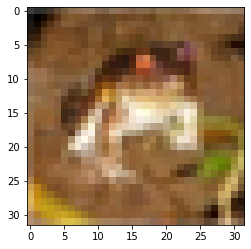

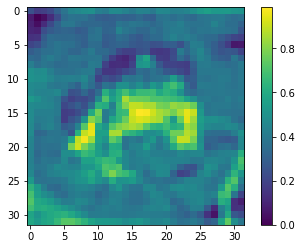

In [15]:
#Ver la imágen original (a color) y la conversión a blanco y negro)
plt.figure()
plt.imshow(train_images[0])
plt.show()
plt.imshow(train_images_2[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images_gr = train_images_2.reshape(train_images_2.shape[0], 32, 32, 1)
test_images_gr = test_images_2.reshape(test_images_2.shape[0], 32, 32, 1)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (50000, 32, 32, 1)
test_images_gr shape: (10000, 32, 32, 1)


### Convolutional Neural Network  - CNN(Modelo 1)

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [33]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (32,32,1)

model = keras.models.Sequential()


# First conv-pool layers - set 1
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

# Flatten layer
# transforma el formato de las imagenes de un arreglo bi-dimensional (de 32 por 32 pixeles) a un arreglo uni dimensional (de 32*32 pixeles = 1024 pixeles)
model.add(keras.layers.Flatten())

# Dense layer with dropout
model.add(keras.layers.Dense(units=32, activation="relu"))

# Output layer
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                57632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 58,042
Trainable params: 58,042
Non-trainable params: 0
__________________________________________________

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(train_images_gr, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.8619 - accuracy: 0.3309
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5960 - accuracy: 0.4393
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4893 - accuracy: 0.4806
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4322 - accuracy: 0.5023
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4001 - accuracy: 0.5147
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.3713 - accuracy: 0.5251
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.3477 - accuracy: 0.5346
Epoch 8/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.3260 - accuracy: 0.5404
Epoch 9/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.3072 - accuracy: 0.5460
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [36]:
test_loss, test_acc = model.evaluate(test_images_gr,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 1.3146 - accuracy: 0.5406

Test accuracy: 0.5406000018119812


### Convolutional Neural Network  - CNN(Modelo 2)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [38]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (32,32,1)

model2 = keras.models.Sequential()


# First conv-pool layers - set 1
model2.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model2.add(keras.layers.Dropout(rate=0.25))

# Flatten layer
# transforma el formato de las imagenes de un arreglo bi-dimensional (de 32 por 32 pixeles) a un arreglo uni dimensional (de 32*32 pixeles = 1024 pixeles)
model2.add(keras.layers.Flatten())

# Dense layers
model2.add(keras.layers.Dense(units=16, activation="relu"))
model2.add(keras.layers.Dense(units=32, activation="relu"))
# Output layer
model2.add(keras.layers.Dense(units=10, activation="softmax"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                28816     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [39]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model2.fit(train_images_gr, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.9895 - accuracy: 0.2420
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.7282 - accuracy: 0.3622
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6300 - accuracy: 0.4113
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5785 - accuracy: 0.4332
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5524 - accuracy: 0.4411
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5242 - accuracy: 0.4512
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4762 - accuracy: 0.4733
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4390 - accuracy: 0.4905
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4086 - accuracy: 0.5028
Epoch 10/10
1563/1563 [==============================] - 71s 46m

In [41]:
test_loss, test_acc = model2.evaluate(test_images_gr,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 1.3656 - accuracy: 0.5215

Test accuracy: 0.5214999914169312


`Se obtuvo mejor resultado con el Modelo 1 (en el conjunto de test 54.06 % vs. 52.14% del modelo 2 )`

### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

In [17]:
#Normalizar las imágenes a COLOR (valores entre 0 y 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
train_images_gr_C = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images_gr_C = test_images.reshape(test_images.shape[0], 32, 32, 3)

print("train_images_gr COLOR shape:", train_images_gr_C.shape)
print("test_images_gr shape COLOR:", test_images_gr_C.shape)

train_images_gr COLOR shape: (50000, 32, 32, 3)
test_images_gr shape COLOR: (10000, 32, 32, 3)


#### CNN - MODELO 1 - Imágenes a COLOR

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [19]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (32,32,3)

modelC = keras.models.Sequential()


# First conv-pool layers - set 1
modelC.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
modelC.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
modelC.add(keras.layers.Dropout(rate=0.25))

# Flatten layer
# transforma el formato de las imagenes de un arreglo bi-dimensional (de 32 por 32 pixeles) a un arreglo uni dimensional (de 32*32 pixeles = 1024 pixeles)
modelC.add(keras.layers.Flatten())

# Dense layer with dropout
modelC.add(keras.layers.Dense(units=32, activation="relu"))

# Output layer
modelC.add(keras.layers.Dense(units=10, activation="softmax"))
modelC.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                57632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 58,186
Trainable params: 58,186
Non-trainable params: 0
____________________________________________________

In [20]:
modelC.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = modelC.fit(train_images_gr_C, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5847 - accuracy: 0.4360
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3516 - accuracy: 0.5192
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.2845 - accuracy: 0.5444
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2413 - accuracy: 0.5620
Epoch 5/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.2103 - accuracy: 0.5717
Epoch 6/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.1814 - accuracy: 0.5820
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.1603 - accuracy: 0.5895
Epoch 8/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1382 - accuracy: 0.5984
Epoch 9/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1201 - accuracy: 0.6023
Epoch 10/10
1563/1563 [==============================] - 74s

In [22]:
test_loss, test_acc = modelC.evaluate(test_images_gr_C,  test_labels, verbose=2)

print('\nTest accuracy MODELO imagenes a COLOR:', test_acc)

313/313 - 3s - loss: 1.1393 - accuracy: 0.6034

Test accuracy MODELO imagenes a COLOR: 0.6033999919891357


`Con las mismas caracteristicas del modelo 1 se obtuvo mejor resultado con las imágenes a color (60.03%) que con las imágenes blanco y negro ( 54.06 % ) `

In [23]:
predictions = modelC.predict(test_images_gr_C)

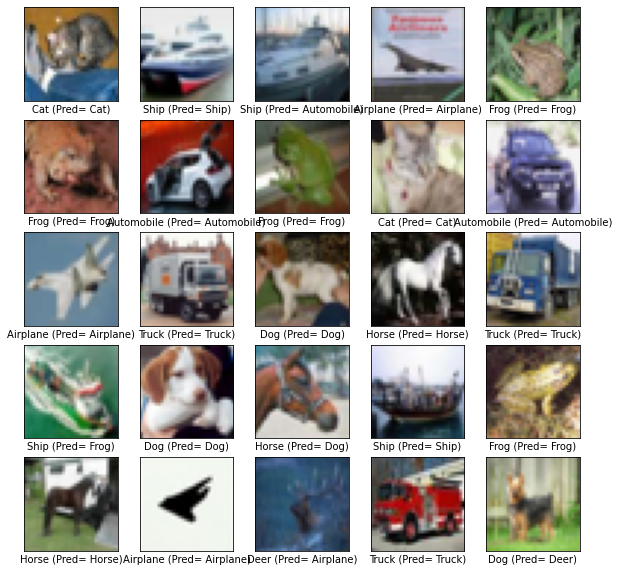

In [81]:
# VER IMAGENES DE TEST VS LO QUE PREDIJO EL MODELO 
# NOTA: (Predictions es un array de 10 posiciones con la probabilidad de que la imagen sea alguna de la esperadas. Se toma la posicion de la que tenga mayor probabilidad )
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_gr_C[i], cmap=plt.cm.binary)
    pred_modelo = np.where(max(predictions[i])==predictions[i])[0][0]
    plt.xlabel(class_names[test_labels[i][0]] + " (Pred= " +class_names[pred_modelo] + ")")
plt.show()